In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Dataset#5_titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.dropna()
df.drop(['Name'], inplace = True, axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
ss = StandardScaler()
df[['Fare','Age']]=ss.fit_transform(df[['Fare','Age']])
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,-0.529366,1,0,-0.503586
1,1,1,0,0.604265,1,0,0.783412
2,1,3,0,-0.245958,0,0,-0.490020
3,1,1,0,0.391709,1,0,0.417948
4,0,3,1,0.391709,0,0,-0.487507


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis = 1), df['Survived'], test_size = 0.2)

In [13]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb.classes_

array([0, 1], dtype=int64)

In [14]:
y_pred = bnb.predict(x_test)
print(y_pred)

[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1]


0.8033707865168539
0.7154471544715447
(178,)


<AxesSubplot:>

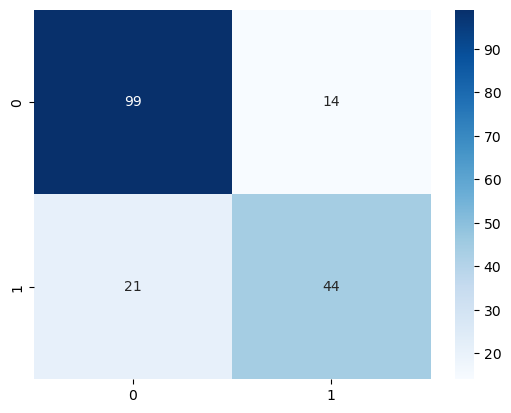

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
acc = accuracy_score(y_pred, y_test)
print(acc)
f1 = f1_score(y_pred, y_test)
print(f1)
print(y_test.shape)
labels=[0, 1]
cm = confusion_matrix(y_pred, y_test, labels = labels)
import seaborn as sns
sns.heatmap(cm, annot = True, cmap='Blues')

0.7918103448275862


<AxesSubplot:>

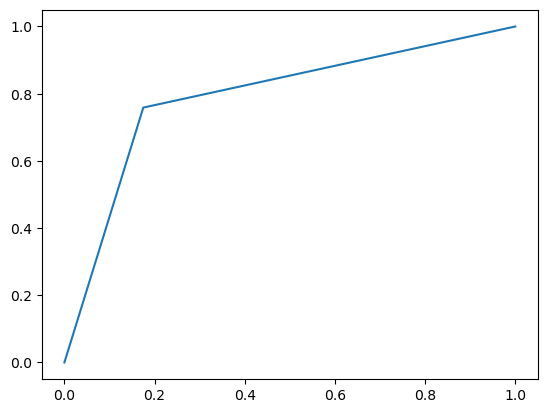

In [19]:
from sklearn.metrics import roc_curve, auc
prob = bnb.predict_proba(x_test)
prob = prob[:, 1]
fpr, tpr,_ = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))
sns.lineplot(x=fpr, y=tpr)